<center><h1>Hong_Seungil_HW2</h1></center>
<br>
<br>

Name: Seungil Hong
<br>
Github Username: zonna19
<br>
USC ID: 

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [2]:
'''pip install pandas pyexcel-ods''' # pyexcel-ods lib installation if required!

Note: you may need to restart the kernel to use updated packages.


Get the Cycle Power Plant Data Set

In [21]:
import pandas as pd
import pyexcel_ods
import seaborn as sns
import matplotlib.pyplot as plt


# Load data from the Folds5x2_pp.ods file
data = pyexcel_ods.get_data('../data/CCPP/Folds5x2_pp.ods')

In [94]:
# data to a Pandas DataFrame
ccpp_df = pd.DataFrame(data['Sheet1'])  # Replace 'Sheet1' with the actual sheet name in your .ods file

ccpp_df.columns = ccpp_df.iloc[0] # take the first row as column names

ccpp_df = ccpp_df[1:] #drop the first row

ccpp_df

,AT,V,AP,RH,PE
1,14.96,41.76,1024.07,73.17,463.26
2,25.18,62.96,1020.04,59.08,444.37
3,5.11,39.4,1012.16,92.14,488.56
4,20.86,57.32,1010.24,76.64,446.48
5,10.82,37.5,1009.23,96.62,473.9
...,...,...,...,...,...
9564,16.65,49.69,1014.01,91,460.03
9565,13.19,39.18,1023.67,66.78,469.62
9566,31.32,74.33,1012.92,36.48,429.57
9567,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

#### i. rows and columns

In [95]:
print("Number of Rows : ", len(ccpp_df))
print("Number of Columns : ", len(ccpp_df.columns))

Number of Rows :  9568
Number of Columns :  5


Rows representing different sets of data in certain amibient conditions, Columns are independent data to figure out what effects PE (dependant) with different variables.

#### ii. pairwise scatterplots of all the varianbles

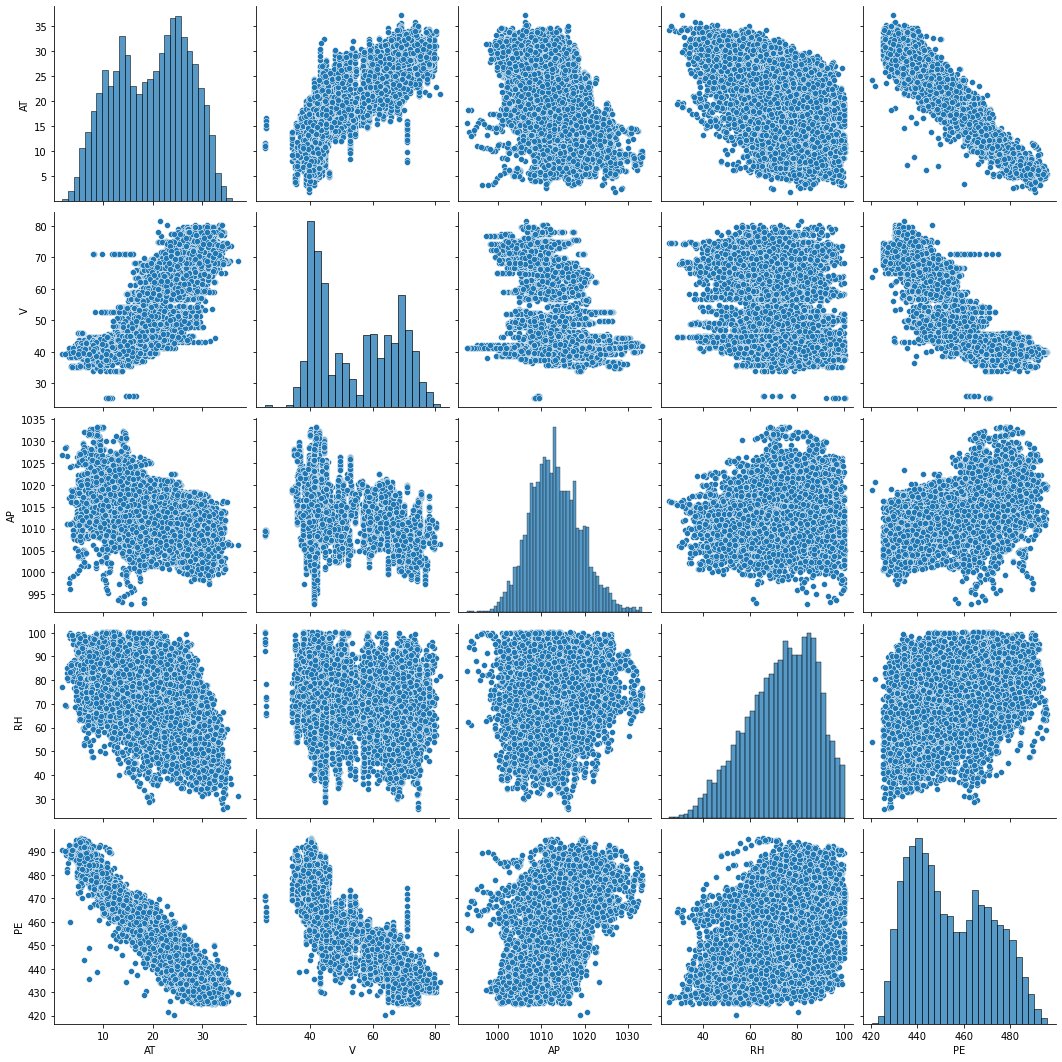

In [87]:
sns.pairplot(ccpp_df, height=3)

Findings: 1. Strong linear relationship with AT and V to PE. 2. although two independent variables, V and AT are somehow showing relations.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [96]:
ccpp_df = ccpp_df.apply(pd.to_numeric, errors='coerce')

In [100]:
mean = ccpp_df.mean()
median = ccpp_df.median()
range = ccpp_df.max() - ccpp_df.min()
q1_val = ccpp_df.quantile(0.25)
q3_val = ccpp_df.quantile(0.75)
iqr_val = q3_val - q1_val

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Range': range,
    'Q1': q1_val,
    'Q3': q3_val,
    'IQR': iqr_val
})

pd.DataFrame(summary_df, index = ['AT', 'V', 'AP', 'RH', 'PE'], \
                   columns = ['Mean', 'Median', 'Range', 'Q1', 'Q3', 'IQR'])

,Mean,Median,Range,Q1,Q3,IQR
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


### (c) Simple Linear Regression

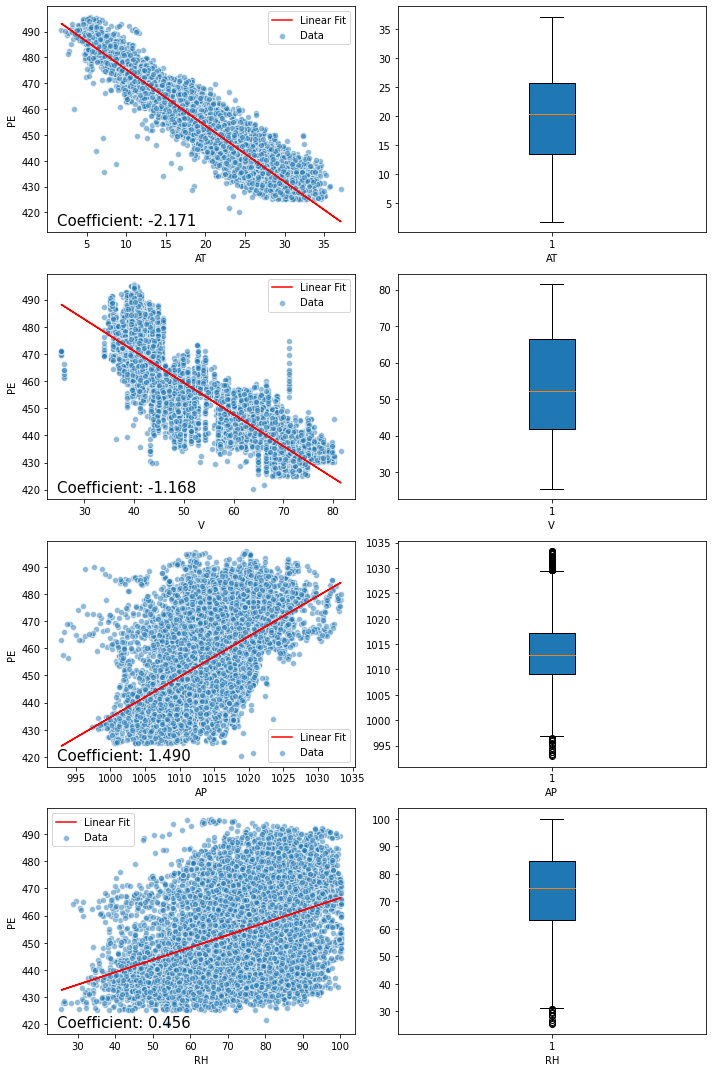

In [140]:
from scipy import stats

def plot_linear_fit(x_data, y_data, feature_name):
    slope, intercept, _, _, _ = stats.linregress(x_data, y_data)
    line = slope * x_data + intercept

    plt.scatter(x_data, y_data, label='Data', alpha=0.5, edgecolors='w', linewidths=1)
    plt.plot(x_data, line, color='red', label='Linear Fit')
    plt.xlabel(feature_name)
    plt.ylabel('PE')
    plt.legend()
    
    # Add coefficient to the plot
    plt.text(0.03, 0.03, f'Coefficient: {slope:.3f}', transform=plt.gca().transAxes, fontsize=15)

def plot_boxplot(x_data, feature_name):
    plt.boxplot(x_data, patch_artist=True)
    plt.xlabel(feature_name)

def main():
    fig, axes = plt.subplots(4, 2, figsize=(10, 15))
    features = ['AT', 'V', 'AP', 'RH']
    coefficient = []

    # Predictors
    y_data = ccpp_df['PE']

    for i, feature_name in enumerate(features):
        x_data = ccpp_df[feature_name]
        
        plt.subplot(4, 2, 2 * i + 1)
        plot_linear_fit(x_data, y_data, feature_name)
        
        plt.subplot(4, 2, 2 * i + 2)
        plot_boxplot(x_data, feature_name)

        coefficient.append(stats.linregress(x_data, y_data).slope)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

### (d) Multiple Regression

### (e) 1c Compare to 1d

### (f) Nonlinear Association

### (g) Interactions of Predictors

### (h) Improvement

### (i) KNN

### (j ) Compare KNN and Linear

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

### (c) The relationship between the predictors and response is highly non-linear.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

### (b) What is our prediction with K = 1? Why?

### (c) What is our prediction with K = 3? Why?

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?